<a href="https://colab.research.google.com/github/njaunick/Project1-Team4-/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset

Dataset URL: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset
License(s): other
 84% 32.0M/38.2M [00:00<00:00, 77.1MB/s]
100% 38.2M/38.2M [00:00<00:00, 59.2MB/s]


In [4]:
!unzip /content/usa-real-estate-dataset.zip

Archive:  /content/usa-real-estate-dataset.zip
  inflating: realtor-data.zip.csv    


In [29]:
!ls /content/

realtor-data.zip.csv  sample_data  usa-real-estate-dataset.zip


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
real_estate = pd.read_csv('/content/realtor-data.zip.csv')

In [75]:
real_estate_df = pd.DataFrame(real_estate)
real_estate_df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


In [76]:
real_estate_df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [80]:
real_estate_df2 = real_estate_df.dropna()
real_estate_df2

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2277,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
3409,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
3410,67455.0,for_sale,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,2012-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


In [81]:
real_estate_df2["prev_sold_date"].isnull().sum()

0

In [90]:
# Convert object types to strings
columns_to_convert = ["status", "city", "state"]

for col in columns_to_convert:
    real_estate_df2[col] = real_estate_df2[col].astype("string")

real_estate_df2["prev_sold_date"] = pd.to_datetime(real_estate_df2["prev_sold_date"])

<ipython-input-90-cf3972573b72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_estate_df2[col] = real_estate_df2[col].astype("string")
<ipython-input-90-cf3972573b72>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_estate_df2["prev_sold_date"] = pd.to_datetime(real_estate_df2["prev_sold_date"])


In [93]:
real_estate_df2 = real_estate_df2.drop(columns={"street"}, axis=1)
real_estate_df2 = real_estate_df2.reset_index(drop=True)
real_estate_df2

,brokered_by,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
0,92147.0,for_sale,110000.0,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
1,94933.0,for_sale,950000.0,5.0,4.0,0.99,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2,103341.0,for_sale,6899000.0,4.0,6.0,0.83,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
3,21163.0,for_sale,525000.0,3.0,3.0,0.45,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
4,67455.0,for_sale,289900.0,3.0,2.0,0.36,Agawam,Massachusetts,1001.0,1276.0,2012-10-12
...,...,...,...,...,...,...,...,...,...,...,...
1084904,23009.0,sold,359900.0,4.0,2.0,0.33,Richland,Washington,99354.0,3600.0,2022-03-25
1084905,18208.0,sold,350000.0,3.0,2.0,0.10,Richland,Washington,99354.0,1616.0,2022-03-25
1084906,76856.0,sold,440000.0,6.0,3.0,0.50,Richland,Washington,99354.0,3200.0,2022-03-24
1084907,53618.0,sold,179900.0,2.0,1.0,0.09,Richland,Washington,99354.0,933.0,2022-03-24


AVERAGE PRICE OF HOMES IN DIFFERENT STATES

In [97]:
avg_price = real_estate_df2.groupby("state")["price"].mean().apply(lambda x: '{:.2f}'.format(x))
avg_price

,price
state,
Alabama,309719.95
Alaska,494244.96
Arizona,542448.49
Arkansas,335893.50
California,1079507.88
Colorado,808673.17
Connecticut,792832.75
Delaware,396970.83
District of Columbia,1188105.02


In [106]:
avg_price = avg_price.astype(float)
avg_price.info()

<class 'pandas.core.series.Series'>
Index: 53 entries, Alabama to Wyoming
Series name: price
Non-Null Count  Dtype  
--------------  -----  
53 non-null     float64
dtypes: float64(1)
memory usage: 2.9 KB


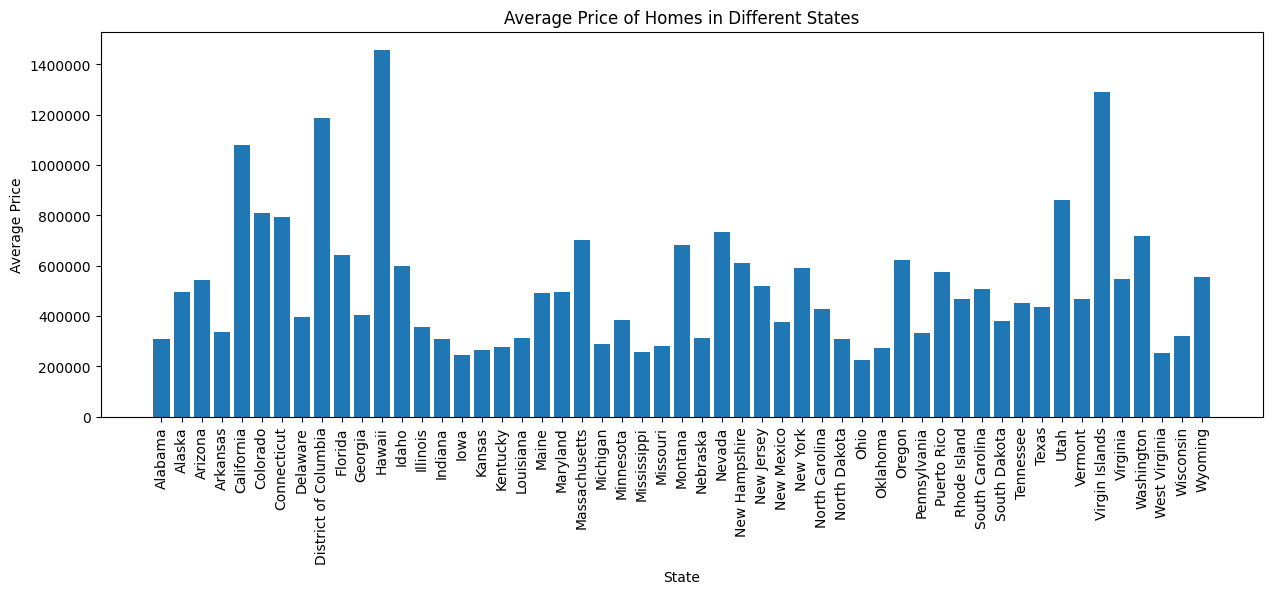

In [130]:
# Change the figure size
plt.rcParams["figure.figsize"] = (15, 5)

# Changes the y axis figures
plt.rcParams["axes.formatter.limits"] = (-5, 12)

# Plots the bar graph
plt.bar(avg_price.index, avg_price.values)
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Average Price")
plt.title("Average Price of Homes in Different States")
plt.show()